Found models: ['distilbert-base-uncased', 'roberta-base', 'google_mobilebert-uncased', 'bert-large-uncased', 'bert-base-uncased', 'distilroberta-base']
Found JSON: ./results3/ss/distilbert-base-uncased/4bit/ss_distilbert-base-uncased_4bit_seed42.json
Extracted SSS for distilbert-base-uncased (4bit): 60.11396011396012
Found JSON: ./results3/ss/distilbert-base-uncased/8bit/ss_distilbert-base-uncased_8bit_seed42.json
Extracted SSS for distilbert-base-uncased (8bit): 60.636277302943974
Found JSON: ./results3/ss/distilbert-base-uncased/float16/ss_distilbert-base-uncased_float16_seed42.json
Extracted SSS for distilbert-base-uncased (float16): 60.49382716049383
Found JSON: ./results3/ss/distilbert-base-uncased/float32/ss_distilbert-base-uncased_float32_seed42.json
Extracted SSS for distilbert-base-uncased (float32): 60.58879392212726
Found JSON: ./results3/ss/roberta-base/4bit/ss_roberta-base_4bit_seed42.json
Extracted SSS for roberta-base (4bit): 59.63912630579298
Found JSON: ./results3/ss/r

<Figure size 1200x600 with 0 Axes>

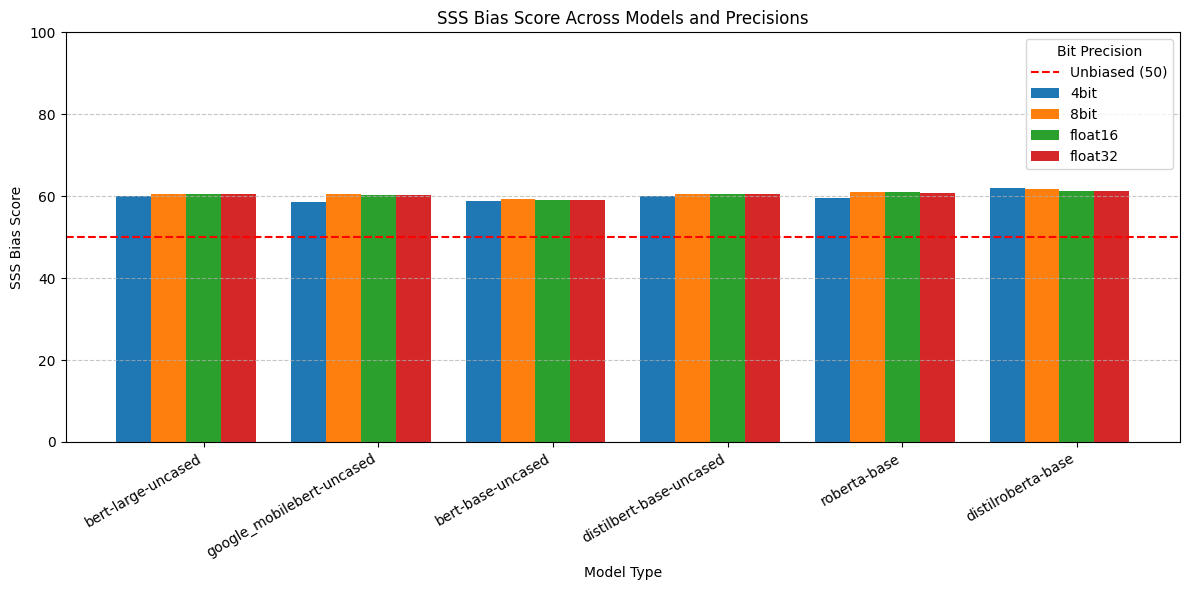

In [44]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Base directory containing the dataset results
base_dir = "./results3/ss"  # Change to "./cps" for CPS dataset
# List of bit precisions
bit_precisions = ["4bit", "8bit", "float16", "float32"]

# Dictionary to store SSS values per model and precision
ss_scores = {model: {precision: None for precision in bit_precisions} for model in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, model))}

print(f"Found models: {list(ss_scores.keys())}")

# Traverse models and extract SSS scores
for model in ss_scores.keys():
    for precision in bit_precisions:
        json_path = os.path.join(base_dir, model, precision)
        if not os.path.exists(json_path):
            print(f"Skipping missing precision folder: {json_path}")
            continue  # Skip if the precision folder doesn't exist

        # Find JSON result file
        found_file = False
        for file in os.listdir(json_path):
            if file.endswith(".json") and file.startswith("ss"):  # Ensure it's a JSON result file
                file_path = os.path.join(json_path, file)
                print(f"Found JSON: {file_path}")  # Debug: Print the file found
                with open(file_path, "r") as f:
                    data = json.load(f)
                    # Extract 'sss' instead of 'SSS' (case-sensitive fix)
                    if "sss" in data and "total" in data["sss"]:  # Change from "SSS" to "sss"
                        ss_scores[model][precision] = data["sss"]["total"]
                        print(f"Extracted SSS for {model} ({precision}): {data['sss']['total']}")  # Debug: Print extracted value
                    else:
                        print(f"Warning: 'sss' total missing in {file_path}")  # Updated warning message

                found_file = True
                break  # Stop after finding one valid file
        
        if not found_file:
            print(f"No valid JSON found for {model} ({precision})")

# Check if any values were extracted
print("\nFinal extracted SSS scores:")
for model, precisions in ss_scores.items():
    for precision, value in precisions.items():
        print(f"{model} - {precision}: {value}")

# Prepare data for plotting
models = list(ss_scores.keys())
num_models = len(models)
bar_width = 0.2  # Width of each bar
x = np.arange(num_models)  # X positions for models

# Create figure
plt.figure(figsize=(12, 6))
# Define custom model order
custom_order = [
    "bert-large-uncased",
    "google_mobilebert-uncased",
    "bert-base-uncased",
    "distilbert-base-uncased",
    "roberta-base", 
    "distilroberta-base"
]
# Filter out models that might be missing in data
models = [m for m in custom_order if m in ss_scores]

# Generate ordered data for plotting
num_models = len(models)
bar_width = 0.2  # Width of each bar
x = np.arange(num_models)  # X positions for models

# Create figure
plt.figure(figsize=(12, 6))

# Plot bars for each precision
for i, precision in enumerate(bit_precisions):
    y_values = [ss_scores[model][precision] if ss_scores[model][precision] is not None else 0 for model in models]
    plt.bar(x + i * bar_width, y_values, width=bar_width, label=precision)

# Set Y-axis limit to 100
plt.ylim(0, 100)

# Add a horizontal line at 50 (unbiased score)
plt.axhline(50, color='red', linestyle='--', linewidth=1.5, label="Unbiased (50)")

# Labeling
plt.xticks(x + bar_width * (len(bit_precisions) / 2), models, rotation=30, ha="right")
plt.xlabel("Model Type")
plt.ylabel("SSS Bias Score")
plt.title("SSS Bias Score Across Models and Precisions")
plt.legend(title="Bit Precision")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()



Extracting SSS scores for float32 precision...
Found JSON: ./results3/ss/bert-large-uncased/float32/ss_bert-large-uncased_float32_seed42.json
Extracted race SSS for bert-large-uncased: 58.004158004158
Extracted gender SSS for bert-large-uncased: 64.70588235294117
Extracted religion SSS for bert-large-uncased: 59.49367088607595
Extracted profession SSS for bert-large-uncased: 62.34567901234568
Found JSON: ./results3/ss/google_mobilebert-uncased/float32/ss_google_mobilebert-uncased_float32_seed42.json
Extracted race SSS for google_mobilebert-uncased: 58.316008316008315
Extracted gender SSS for google_mobilebert-uncased: 62.745098039215684
Extracted religion SSS for google_mobilebert-uncased: 59.49367088607595
Extracted profession SSS for google_mobilebert-uncased: 62.22222222222222

Extracting SSS scores for float32 precision...
Found JSON: ./results3/ss/bert-base-uncased/float32/ss_bert-base-uncased_float32_seed42.json
Extracted race SSS for bert-base-uncased: 56.029106029106025
Extrac

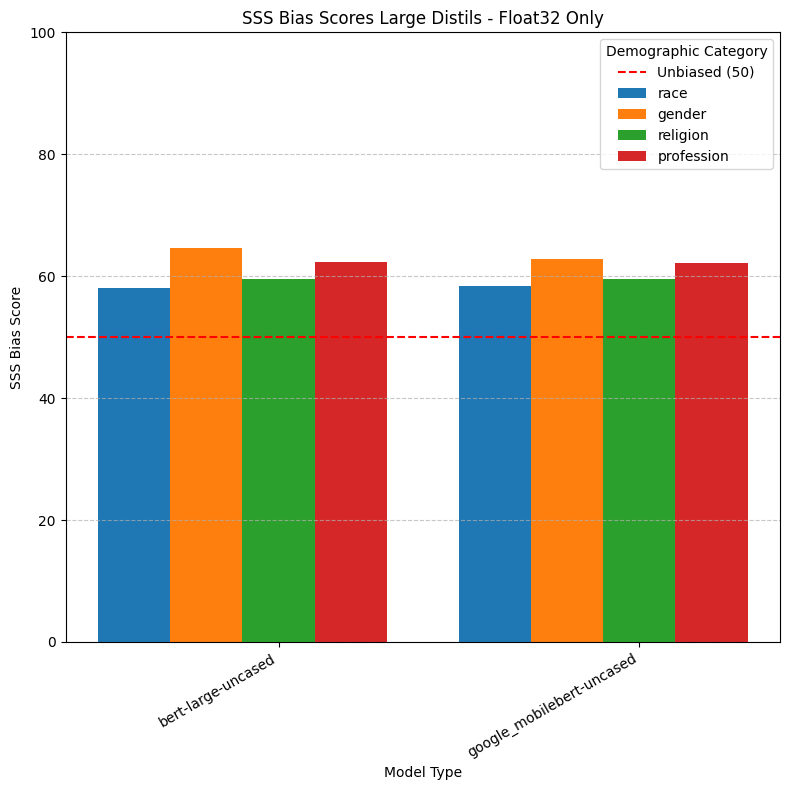

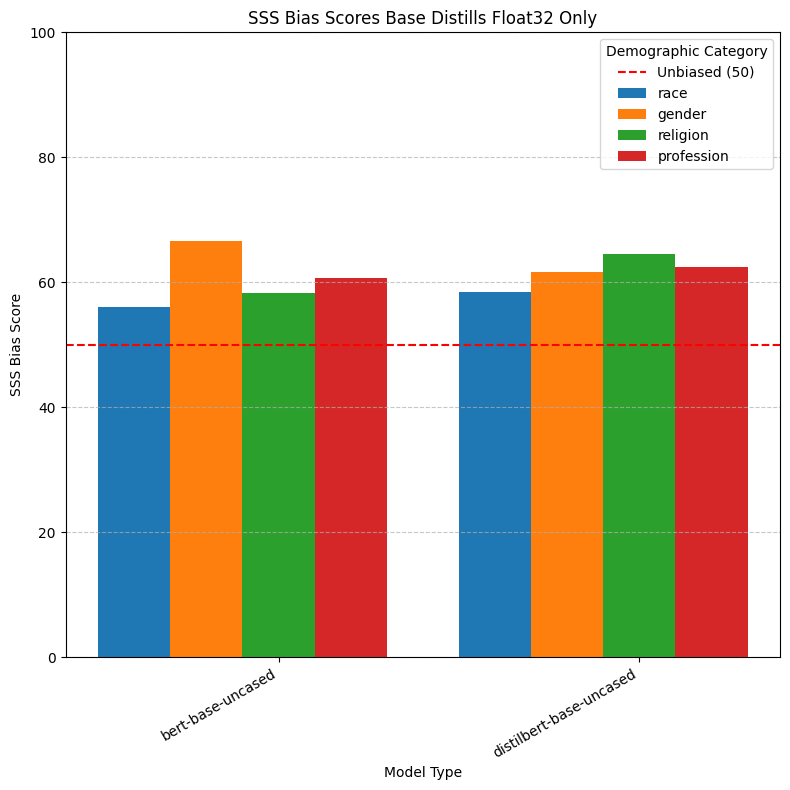

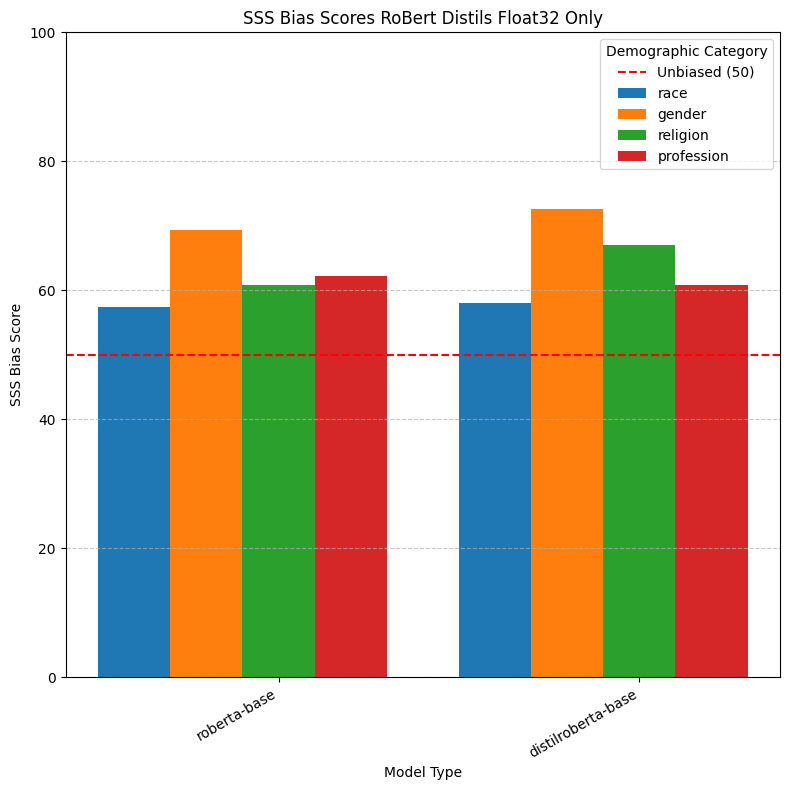

In [46]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Base directory containing the dataset results
base_dir = "./results3/ss"

# Only consider float32 precision
selected_precision = "float32"

# SSS categories (race, gender, religion, profession)
sss_categories = ["race", "gender", "religion", "profession"]

# Split models into two groups
large_mobile_models = ["bert-large-uncased", "google_mobilebert-uncased"]
other_models = ["bert-base-uncased", "distilbert-base-uncased"]
robert_models = ["roberta-base", "distilroberta-base"]
# Function to extract SSS scores for a given model group
def extract_sss_scores(model_list):
    sss_scores = {model: {category: None for category in sss_categories} for model in model_list}

    print(f"\nExtracting SSS scores for {selected_precision} precision...")

    # Traverse models and extract SSS scores
    for model in model_list:
        json_path = os.path.join(base_dir, model, selected_precision)
        if not os.path.exists(json_path):
            print(f"Skipping missing precision folder: {json_path}")
            continue

        # Find JSON result file
        found_file = False
        for file in os.listdir(json_path):
            if file.endswith(".json") and file.startswith("ss"):  # Ensure it's a JSON result file
                file_path = os.path.join(json_path, file)
                print(f"Found JSON: {file_path}")  # Debug print

                with open(file_path, "r") as f:
                    data = json.load(f)
                    if "sss" in data:  # Extract individual SSS categories
                        for category in sss_categories:
                            if category in data["sss"]:
                                sss_scores[model][category] = data["sss"][category]
                                print(f"Extracted {category} SSS for {model}: {sss_scores[model][category]}")
                    else:
                        print(f"Warning: 'sss' missing in {file_path}")

                found_file = True
                break  # Stop after finding one valid file

        if not found_file:
            print(f"No valid JSON found for {model}")

    return sss_scores

# Extract scores for both groups (only float32 precision)
large_mobile_sss_scores = extract_sss_scores(large_mobile_models)
other_sss_scores = extract_sss_scores(other_models)
robert_sss_scores = extract_sss_scores(robert_models)

# Function to plot SSS scores
def plot_sss_scores(sss_scores, model_list, title):
    models = list(sss_scores.keys())
    num_models = len(models)
    bar_width = 0.2  # Width of each bar
    x = np.arange(num_models)  # X positions for models

    # Create figure
    plt.figure(figsize=(8, 8))

    # Plot bars for each SSS category
    for i, category in enumerate(sss_categories):
        y_values = [sss_scores[model][category] if sss_scores[model][category] is not None else 0 for model in models]
        plt.bar(x + i * bar_width, y_values, width=bar_width, label=category)

    # Set Y-axis limit to 100
    plt.ylim(0, 100)

    # Add a horizontal line at 50 (unbiased score)
    plt.axhline(50, color='red', linestyle='--', linewidth=1.5, label="Unbiased (50)")

    # Labeling
    plt.xticks(x + bar_width * (len(sss_categories) / 2), models, rotation=30, ha="right")
    plt.xlabel("Model Type")
    plt.ylabel("SSS Bias Score")
    plt.title(title)
    plt.legend(title="Demographic Category")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot first group (Large & MobileBERT)
plot_sss_scores(large_mobile_sss_scores, large_mobile_models, "SSS Bias Scores Large Distils - Float32 Only")

# Plot second group (Other models)
plot_sss_scores(other_sss_scores, other_models, "SSS Bias Scores Base Distills Float32 Only")

plot_sss_scores(robert_sss_scores, robert_models, "SSS Bias Scores RoBert Distils Float32 Only")


Looking for SSS scores in float32 precision...
Found JSON: ./results3/ss/bert-large-uncased/float32/ss_bert-large-uncased_float32_seed42.json
Extracted race SSS for bert-large-uncased: 58.004158004158
Extracted gender SSS for bert-large-uncased: 64.70588235294117
Extracted religion SSS for bert-large-uncased: 59.49367088607595
Extracted profession SSS for bert-large-uncased: 62.34567901234568
Found JSON: ./results3/ss/google_mobilebert-uncased/float32/ss_google_mobilebert-uncased_float32_seed42.json
Extracted race SSS for google_mobilebert-uncased: 58.316008316008315
Extracted gender SSS for google_mobilebert-uncased: 62.745098039215684
Extracted religion SSS for google_mobilebert-uncased: 59.49367088607595
Extracted profession SSS for google_mobilebert-uncased: 62.22222222222222
Found JSON: ./results3/ss/bert-base-uncased/float32/ss_bert-base-uncased_float32_seed42.json
Extracted race SSS for bert-base-uncased: 56.029106029106025
Extracted gender SSS for bert-base-uncased: 66.66666666

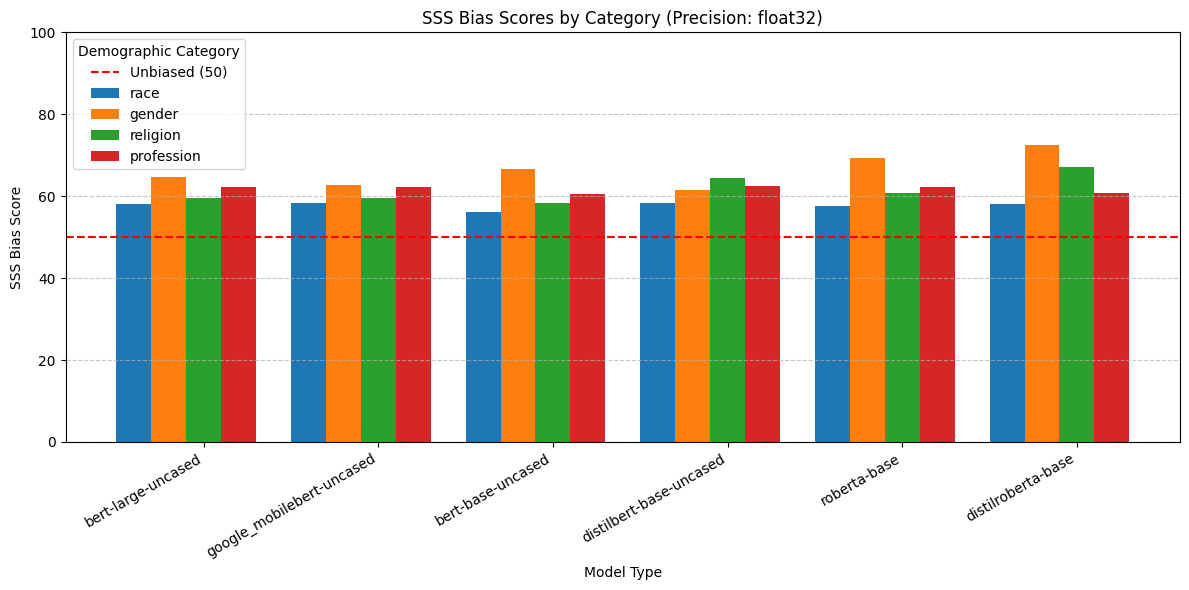

In [47]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Base directory containing the dataset results
base_dir = "./results3/ss"

# List of bit precisions (we pick one, e.g., float32, for consistency)
selected_precision = "float32"

# SSS categories (race, gender, religion, profession)
sss_categories = ["race", "gender", "religion", "profession"]

# Define custom model order
custom_order = [
    "bert-large-uncased",
    "google_mobilebert-uncased",
    "bert-base-uncased",
    "distilbert-base-uncased",
    "roberta-base", 
    "distilroberta-base"
]
# robert_models = ["roberta-base", "distilroberta-base"]

# Dictionary to store SSS category scores per model
sss_scores = {model: {category: None for category in sss_categories} for model in custom_order}

print(f"Looking for SSS scores in {selected_precision} precision...")

# Traverse models and extract SSS scores
for model in custom_order:
    json_path = os.path.join(base_dir, model, selected_precision)
    if not os.path.exists(json_path):
        print(f"Skipping missing precision folder: {json_path}")
        continue

    # Find JSON result file
    found_file = False
    for file in os.listdir(json_path):
        if file.endswith(".json") and file.startswith("ss"):  # Ensure it's a JSON result file
            file_path = os.path.join(json_path, file)
            print(f"Found JSON: {file_path}")  # Debug print

            with open(file_path, "r") as f:
                data = json.load(f)
                if "sss" in data:  # Extract individual SSS categories
                    for category in sss_categories:
                        if category in data["sss"]:
                            sss_scores[model][category] = data["sss"][category]
                            print(f"Extracted {category} SSS for {model}: {data['sss'][category]}")
                else:
                    print(f"Warning: 'sss' missing in {file_path}")

            found_file = True
            break  # Stop after finding one valid file

    if not found_file:
        print(f"No valid JSON found for {model}")

# Prepare data for plotting
models = list(sss_scores.keys())
num_models = len(models)
bar_width = 0.2  # Width of each bar
x = np.arange(num_models)  # X positions for models

# Create figure
plt.figure(figsize=(12, 6))

# Plot bars for each SSS category
for i, category in enumerate(sss_categories):
    y_values = [sss_scores[model][category] if sss_scores[model][category] is not None else 0 for model in models]
    plt.bar(x + i * bar_width, y_values, width=bar_width, label=category)

# Set Y-axis limit to 100
plt.ylim(0, 100)

# Add a horizontal line at 50 (unbiased score)
plt.axhline(50, color='red', linestyle='--', linewidth=1.5, label="Unbiased (50)")

# Labeling
plt.xticks(x + bar_width * (len(sss_categories) / 2), models, rotation=30, ha="right")
plt.xlabel("Model Type")
plt.ylabel("SSS Bias Score")
plt.title(f"SSS Bias Scores by Category (Precision: {selected_precision})")
plt.legend(title="Demographic Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()



Looking for SSS scores in 4bit precision...
Found JSON: ./results3/ss/bert-large-uncased/4bit/ss_bert-large-uncased_4bit_seed42.json
Extracted race SSS for bert-large-uncased: 57.9002079002079
Extracted gender SSS for bert-large-uncased: 64.70588235294117
Extracted religion SSS for bert-large-uncased: 56.9620253164557
Extracted profession SSS for bert-large-uncased: 61.72839506172839
Found JSON: ./results3/ss/google_mobilebert-uncased/4bit/ss_google_mobilebert-uncased_4bit_seed42.json
Extracted race SSS for google_mobilebert-uncased: 54.98960498960499
Extracted gender SSS for google_mobilebert-uncased: 64.31372549019608
Extracted religion SSS for google_mobilebert-uncased: 62.0253164556962
Extracted profession SSS for google_mobilebert-uncased: 60.98765432098765
Found JSON: ./results3/ss/bert-base-uncased/4bit/ss_bert-base-uncased_4bit_seed42.json
Extracted race SSS for bert-base-uncased: 56.237006237006234
Extracted gender SSS for bert-base-uncased: 65.09803921568627
Extracted religi

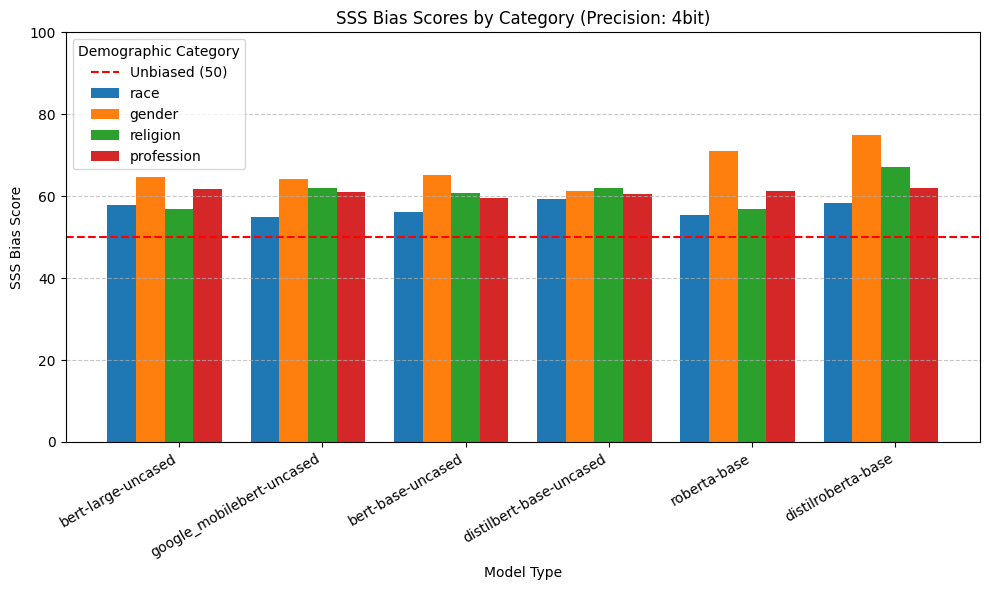


Looking for SSS scores in 8bit precision...
Found JSON: ./results3/ss/bert-large-uncased/8bit/ss_bert-large-uncased_8bit_seed42.json
Extracted race SSS for bert-large-uncased: 58.108108108108105
Extracted gender SSS for bert-large-uncased: 65.09803921568627
Extracted religion SSS for bert-large-uncased: 59.49367088607595
Extracted profession SSS for bert-large-uncased: 62.34567901234568
Found JSON: ./results3/ss/google_mobilebert-uncased/8bit/ss_google_mobilebert-uncased_8bit_seed42.json
Extracted race SSS for google_mobilebert-uncased: 58.21205821205822
Extracted gender SSS for google_mobilebert-uncased: 63.13725490196078
Extracted religion SSS for google_mobilebert-uncased: 59.49367088607595
Extracted profession SSS for google_mobilebert-uncased: 62.46913580246913
Found JSON: ./results3/ss/bert-base-uncased/8bit/ss_bert-base-uncased_8bit_seed42.json
Extracted race SSS for bert-base-uncased: 56.237006237006234
Extracted gender SSS for bert-base-uncased: 66.27450980392156
Extracted re

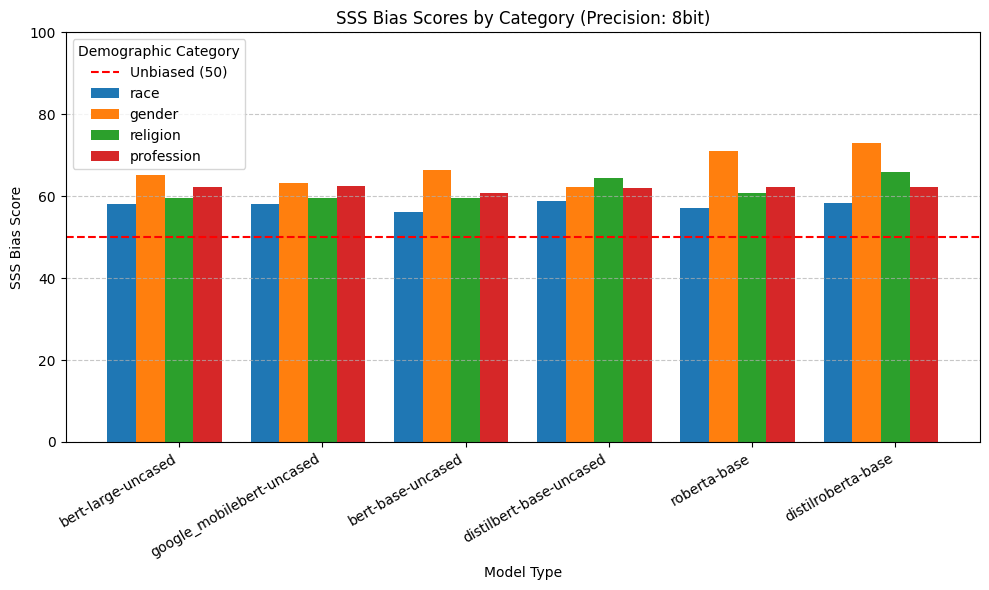


Looking for SSS scores in float16 precision...
Found JSON: ./results3/ss/bert-large-uncased/float16/ss_bert-large-uncased_float16_seed42.json
Extracted race SSS for bert-large-uncased: 58.004158004158
Extracted gender SSS for bert-large-uncased: 64.70588235294117
Extracted religion SSS for bert-large-uncased: 59.49367088607595
Extracted profession SSS for bert-large-uncased: 62.34567901234568
Found JSON: ./results3/ss/google_mobilebert-uncased/float16/ss_google_mobilebert-uncased_float16_seed42.json
Extracted race SSS for google_mobilebert-uncased: 58.21205821205822
Extracted gender SSS for google_mobilebert-uncased: 62.745098039215684
Extracted religion SSS for google_mobilebert-uncased: 59.49367088607595
Extracted profession SSS for google_mobilebert-uncased: 62.22222222222222
Found JSON: ./results3/ss/bert-base-uncased/float16/ss_bert-base-uncased_float16_seed42.json
Extracted race SSS for bert-base-uncased: 56.029106029106025
Extracted gender SSS for bert-base-uncased: 66.66666666

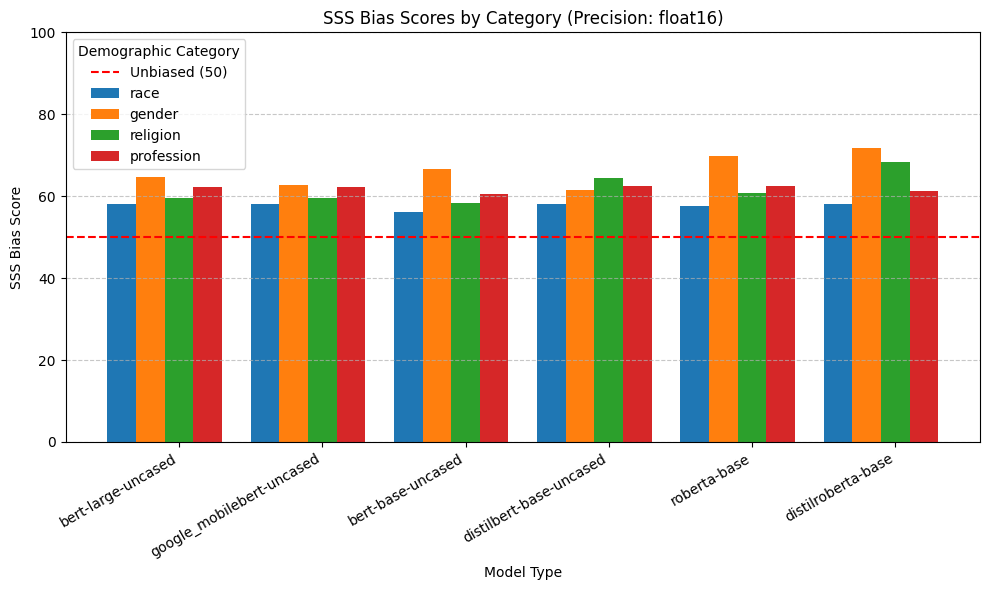


Looking for SSS scores in float32 precision...
Found JSON: ./results3/ss/bert-large-uncased/float32/ss_bert-large-uncased_float32_seed42.json
Extracted race SSS for bert-large-uncased: 58.004158004158
Extracted gender SSS for bert-large-uncased: 64.70588235294117
Extracted religion SSS for bert-large-uncased: 59.49367088607595
Extracted profession SSS for bert-large-uncased: 62.34567901234568
Found JSON: ./results3/ss/google_mobilebert-uncased/float32/ss_google_mobilebert-uncased_float32_seed42.json
Extracted race SSS for google_mobilebert-uncased: 58.316008316008315
Extracted gender SSS for google_mobilebert-uncased: 62.745098039215684
Extracted religion SSS for google_mobilebert-uncased: 59.49367088607595
Extracted profession SSS for google_mobilebert-uncased: 62.22222222222222
Found JSON: ./results3/ss/bert-base-uncased/float32/ss_bert-base-uncased_float32_seed42.json
Extracted race SSS for bert-base-uncased: 56.029106029106025
Extracted gender SSS for bert-base-uncased: 66.6666666

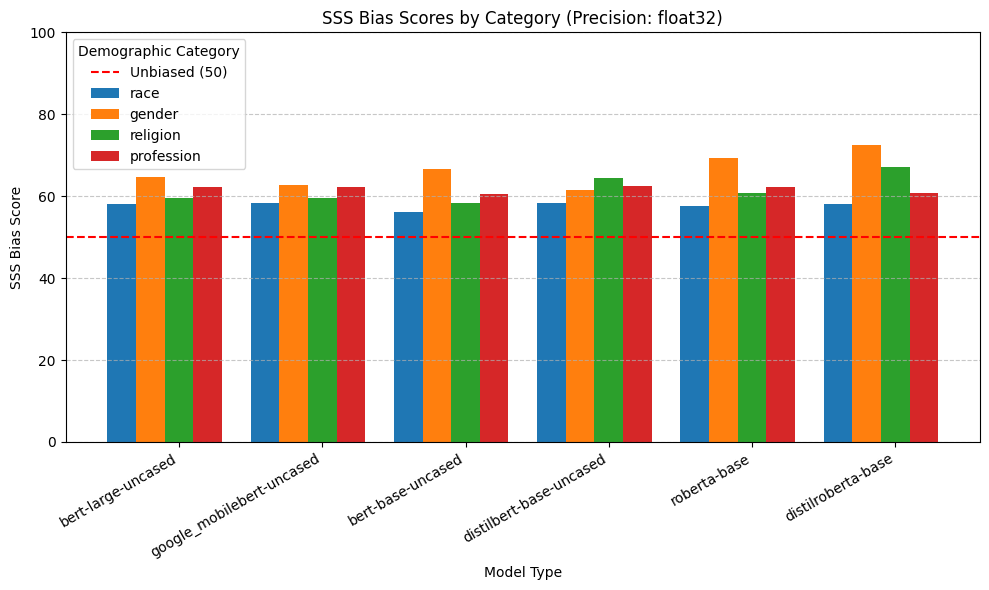

In [52]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Base directory containing the dataset results
base_dir = "./results3/ss"

# List of bit precisions to iterate over
bit_precisions = ["4bit", "8bit", "float16", "float32"]

# SSS categories (race, gender, religion, profession)
sss_categories = ["race", "gender", "religion", "profession"]

# Define custom model order
custom_order = [
    "bert-large-uncased",
    "google_mobilebert-uncased",
    "bert-base-uncased",
    "distilbert-base-uncased",
    "roberta-base", 
    "distilroberta-base"
]

# Iterate through each bit precision and generate a plot
for selected_precision in bit_precisions:
    # Dictionary to store SSS category scores per model
    sss_scores = {model: {category: None for category in sss_categories} for model in custom_order}

    print(f"\nLooking for SSS scores in {selected_precision} precision...")

    # Traverse models and extract SSS scores
    for model in custom_order:
        json_path = os.path.join(base_dir, model, selected_precision)
        if not os.path.exists(json_path):
            print(f"Skipping missing precision folder: {json_path}")
            continue

        # Find JSON result file
        found_file = False
        for file in os.listdir(json_path):
            if file.endswith(".json") and file.startswith("ss"):  # Ensure it's a JSON result file
                file_path = os.path.join(json_path, file)
                print(f"Found JSON: {file_path}")  # Debug print

                with open(file_path, "r") as f:
                    data = json.load(f)
                    if "sss" in data:  # Extract individual SSS categories
                        for category in sss_categories:
                            if category in data["sss"]:
                                sss_scores[model][category] = data["sss"][category]
                                print(f"Extracted {category} SSS for {model}: {sss_scores[model][category]}")
                    else:
                        print(f"Warning: 'sss' missing in {file_path}")

                found_file = True
                break  # Stop after finding one valid file

        if not found_file:
            print(f"No valid JSON found for {model}")

    # Prepare data for plotting
    models = list(sss_scores.keys())
    num_models = len(models)
    bar_width = 0.2  # Width of each bar
    x = np.arange(num_models)  # X positions for models

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot bars for each SSS category
    for i, category in enumerate(sss_categories):
        y_values = [sss_scores[model][category] if sss_scores[model][category] is not None else 0 for model in models]
        plt.bar(x + i * bar_width, y_values, width=bar_width, label=category)

    # Set Y-axis limit to 100
    plt.ylim(0, 100)

    # Add a horizontal line at 50 (unbiased score)
    plt.axhline(50, color='red', linestyle='--', linewidth=1.5, label="Unbiased (50)")

    # Labeling
    plt.xticks(x + bar_width * (len(sss_categories) / 2), models, rotation=30, ha="right")
    plt.xlabel("Model Type")
    plt.ylabel("SSS Bias Score")
    plt.title(f"SSS Bias Scores by Category (Precision: {selected_precision})")
    plt.legend(title="Demographic Category")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()


Extracting SSS scores for bert-base-uncased across bit precisions...
Found JSON: ./results3/ss/bert-base-uncased/4bit/ss_bert-base-uncased_4bit_seed42.json
Extracted race SSS for 4bit: 56.237006237006234
Extracted gender SSS for 4bit: 65.09803921568627
Extracted religion SSS for 4bit: 60.75949367088608
Extracted profession SSS for 4bit: 59.50617283950618
Found JSON: ./results3/ss/bert-base-uncased/8bit/ss_bert-base-uncased_8bit_seed42.json
Extracted race SSS for 8bit: 56.237006237006234
Extracted gender SSS for 8bit: 66.27450980392156
Extracted religion SSS for 8bit: 59.49367088607595
Extracted profession SSS for 8bit: 60.74074074074074
Found JSON: ./results3/ss/bert-base-uncased/float16/ss_bert-base-uncased_float16_seed42.json
Extracted race SSS for float16: 56.029106029106025
Extracted gender SSS for float16: 66.66666666666666
Extracted religion SSS for float16: 58.22784810126582
Extracted profession SSS for float16: 60.617283950617285
Found JSON: ./results3/ss/bert-base-uncased/floa

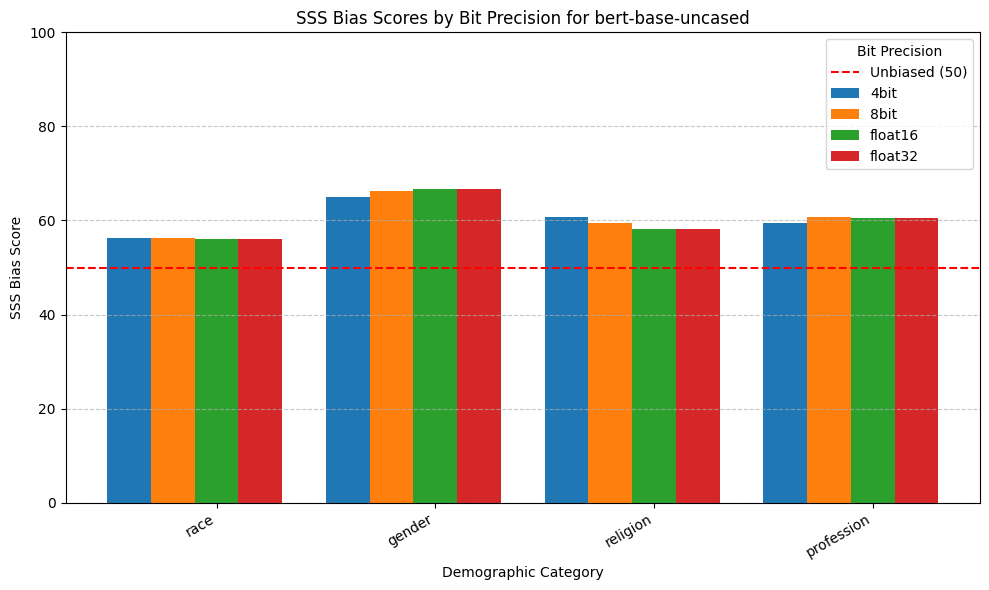

In [53]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Base directory containing the dataset results
base_dir = "./results3/ss"

# Model to analyze
target_model = "bert-base-uncased"

# List of bit precisions
bit_precisions = ["4bit", "8bit", "float16", "float32"]

# SSS categories
sss_categories = ["race", "gender", "religion", "profession"]

# Dictionary to store SSS category scores per bit precision
sss_scores = {precision: {category: None for category in sss_categories} for precision in bit_precisions}

print(f"Extracting SSS scores for {target_model} across bit precisions...")

# Traverse bit precisions and extract SSS scores
for precision in bit_precisions:
    json_path = os.path.join(base_dir, target_model, precision)
    if not os.path.exists(json_path):
        print(f"Skipping missing precision folder: {json_path}")
        continue

    # Find JSON result file
    found_file = False
    for file in os.listdir(json_path):
        if file.endswith(".json") and file.startswith("ss"):  # Ensure it's a JSON result file
            file_path = os.path.join(json_path, file)
            print(f"Found JSON: {file_path}")  # Debug print

            with open(file_path, "r") as f:
                data = json.load(f)
                if "sss" in data:  # Extract individual SSS categories
                    for category in sss_categories:
                        if category in data["sss"]:
                            sss_scores[precision][category] = data["sss"][category]
                            print(f"Extracted {category} SSS for {precision}: {sss_scores[precision][category]}")
                else:
                    print(f"Warning: 'sss' missing in {file_path}")

            found_file = True
            break  # Stop after finding one valid file

    if not found_file:
        print(f"No valid JSON found for {target_model} ({precision})")

# Prepare data for plotting
categories = list(sss_categories)
num_categories = len(categories)
bar_width = 0.2  # Width of each bar
x = np.arange(num_categories)  # X positions for categories

# Create figure
plt.figure(figsize=(10, 6))

# Plot bars for each bit precision
for i, precision in enumerate(bit_precisions):
    y_values = [sss_scores[precision][category] if sss_scores[precision][category] is not None else 0 for category in categories]
    plt.bar(x + i * bar_width, y_values, width=bar_width, label=precision)

# Set Y-axis limit to 100
plt.ylim(0, 100)

# Add a horizontal line at 50 (unbiased score)
plt.axhline(50, color='red', linestyle='--', linewidth=1.5, label="Unbiased (50)")

# Labeling
plt.xticks(x + bar_width * (len(bit_precisions) / 2), categories, rotation=30, ha="right")
plt.xlabel("Demographic Category")
plt.ylabel("SSS Bias Score")
plt.title(f"SSS Bias Scores by Bit Precision for {target_model}")
plt.legend(title="Bit Precision")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


Generating SSS bias plots for all models across bit precisions...

Processing bert-large-uncased...
Found JSON: ./results3/ss/bert-large-uncased/4bit/ss_bert-large-uncased_4bit_seed42.json
Extracted race SSS for bert-large-uncased (4bit): 57.9002079002079
Extracted gender SSS for bert-large-uncased (4bit): 64.70588235294117
Extracted religion SSS for bert-large-uncased (4bit): 56.9620253164557
Extracted profession SSS for bert-large-uncased (4bit): 61.72839506172839
Found JSON: ./results3/ss/bert-large-uncased/8bit/ss_bert-large-uncased_8bit_seed42.json
Extracted race SSS for bert-large-uncased (8bit): 58.108108108108105
Extracted gender SSS for bert-large-uncased (8bit): 65.09803921568627
Extracted religion SSS for bert-large-uncased (8bit): 59.49367088607595
Extracted profession SSS for bert-large-uncased (8bit): 62.34567901234568
Found JSON: ./results3/ss/bert-large-uncased/float16/ss_bert-large-uncased_float16_seed42.json
Extracted race SSS for bert-large-uncased (float16): 58.0041

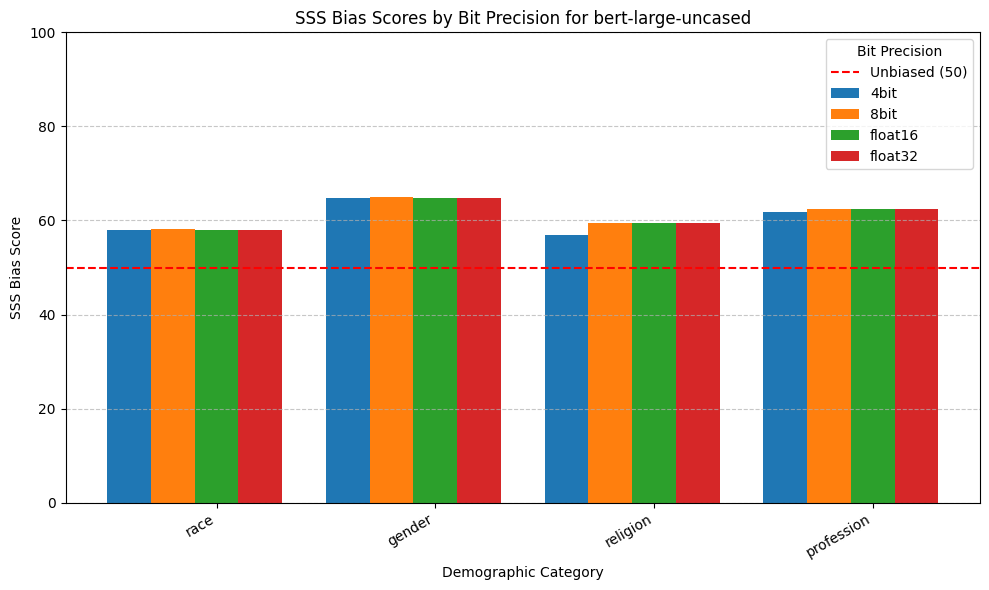

Processing google_mobilebert-uncased...
Found JSON: ./results3/ss/google_mobilebert-uncased/4bit/ss_google_mobilebert-uncased_4bit_seed42.json
Extracted race SSS for google_mobilebert-uncased (4bit): 54.98960498960499
Extracted gender SSS for google_mobilebert-uncased (4bit): 64.31372549019608
Extracted religion SSS for google_mobilebert-uncased (4bit): 62.0253164556962
Extracted profession SSS for google_mobilebert-uncased (4bit): 60.98765432098765
Found JSON: ./results3/ss/google_mobilebert-uncased/8bit/ss_google_mobilebert-uncased_8bit_seed42.json
Extracted race SSS for google_mobilebert-uncased (8bit): 58.21205821205822
Extracted gender SSS for google_mobilebert-uncased (8bit): 63.13725490196078
Extracted religion SSS for google_mobilebert-uncased (8bit): 59.49367088607595
Extracted profession SSS for google_mobilebert-uncased (8bit): 62.46913580246913
Found JSON: ./results3/ss/google_mobilebert-uncased/float16/ss_google_mobilebert-uncased_float16_seed42.json
Extracted race SSS for

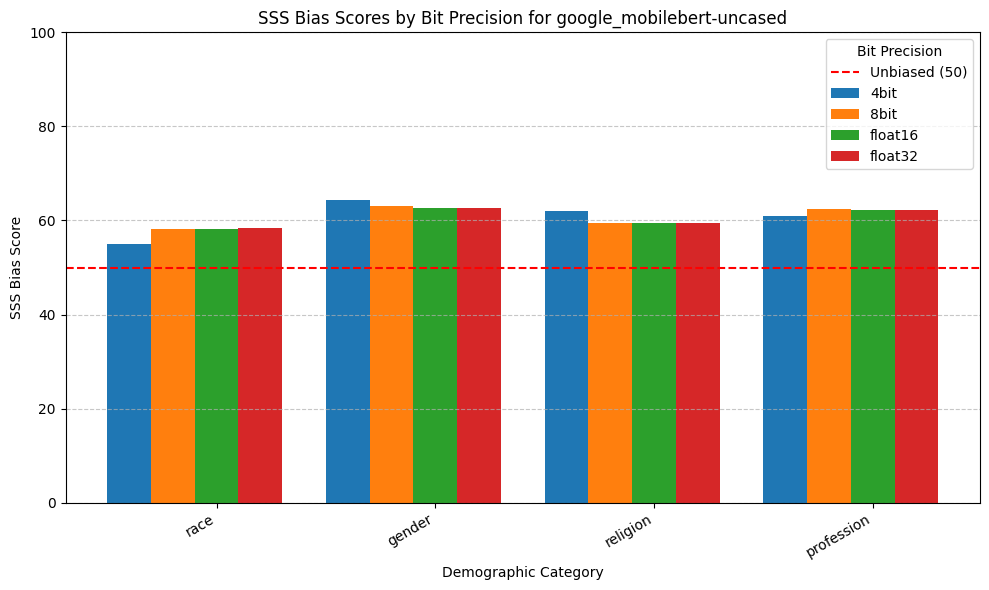

Processing bert-base-uncased...
Found JSON: ./results3/ss/bert-base-uncased/4bit/ss_bert-base-uncased_4bit_seed42.json
Extracted race SSS for bert-base-uncased (4bit): 56.237006237006234
Extracted gender SSS for bert-base-uncased (4bit): 65.09803921568627
Extracted religion SSS for bert-base-uncased (4bit): 60.75949367088608
Extracted profession SSS for bert-base-uncased (4bit): 59.50617283950618
Found JSON: ./results3/ss/bert-base-uncased/8bit/ss_bert-base-uncased_8bit_seed42.json
Extracted race SSS for bert-base-uncased (8bit): 56.237006237006234
Extracted gender SSS for bert-base-uncased (8bit): 66.27450980392156
Extracted religion SSS for bert-base-uncased (8bit): 59.49367088607595
Extracted profession SSS for bert-base-uncased (8bit): 60.74074074074074
Found JSON: ./results3/ss/bert-base-uncased/float16/ss_bert-base-uncased_float16_seed42.json
Extracted race SSS for bert-base-uncased (float16): 56.029106029106025
Extracted gender SSS for bert-base-uncased (float16): 66.66666666666

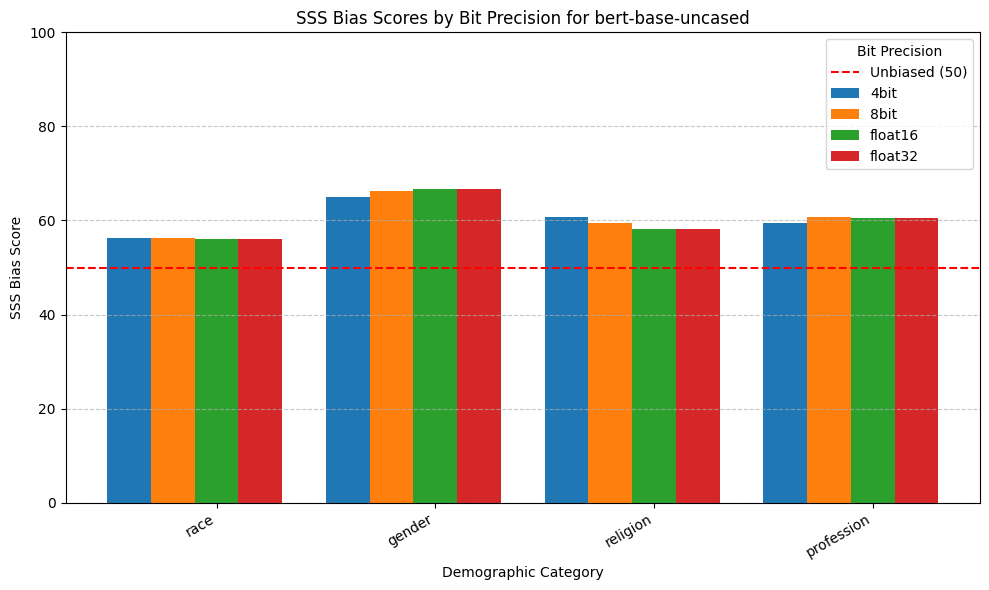

Processing distilbert-base-uncased...
Found JSON: ./results3/ss/distilbert-base-uncased/4bit/ss_distilbert-base-uncased_4bit_seed42.json
Extracted race SSS for distilbert-base-uncased (4bit): 59.35550935550935
Extracted gender SSS for distilbert-base-uncased (4bit): 61.1764705882353
Extracted religion SSS for distilbert-base-uncased (4bit): 62.0253164556962
Extracted profession SSS for distilbert-base-uncased (4bit): 60.49382716049383
Found JSON: ./results3/ss/distilbert-base-uncased/8bit/ss_distilbert-base-uncased_8bit_seed42.json
Extracted race SSS for distilbert-base-uncased (8bit): 58.731808731808734
Extracted gender SSS for distilbert-base-uncased (8bit): 62.35294117647059
Extracted religion SSS for distilbert-base-uncased (8bit): 64.55696202531645
Extracted profession SSS for distilbert-base-uncased (8bit): 61.97530864197531
Found JSON: ./results3/ss/distilbert-base-uncased/float16/ss_distilbert-base-uncased_float16_seed42.json
Extracted race SSS for distilbert-base-uncased (floa

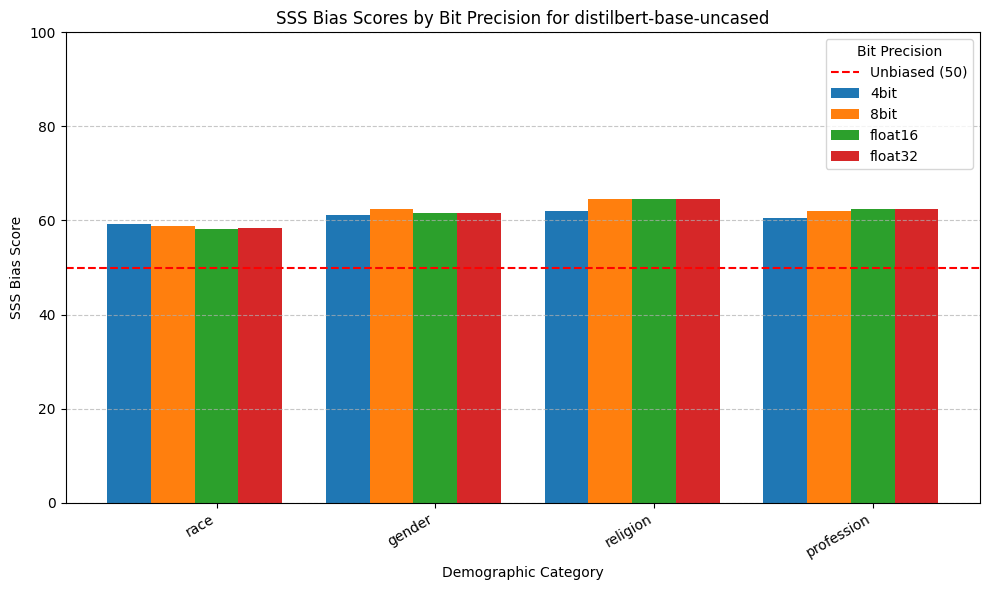

Processing roberta-base...
Found JSON: ./results3/ss/roberta-base/4bit/ss_roberta-base_4bit_seed42.json
Extracted race SSS for roberta-base (4bit): 55.4054054054054
Extracted gender SSS for roberta-base (4bit): 70.98039215686275
Extracted religion SSS for roberta-base (4bit): 56.9620253164557
Extracted profession SSS for roberta-base (4bit): 61.358024691358025
Found JSON: ./results3/ss/roberta-base/8bit/ss_roberta-base_8bit_seed42.json
Extracted race SSS for roberta-base (8bit): 57.17255717255717
Extracted gender SSS for roberta-base (8bit): 70.98039215686275
Extracted religion SSS for roberta-base (8bit): 60.75949367088608
Extracted profession SSS for roberta-base (8bit): 62.22222222222222
Found JSON: ./results3/ss/roberta-base/float16/ss_roberta-base_float16_seed42.json
Extracted race SSS for roberta-base (float16): 57.484407484407484
Extracted gender SSS for roberta-base (float16): 69.80392156862744
Extracted religion SSS for roberta-base (float16): 60.75949367088608
Extracted profe

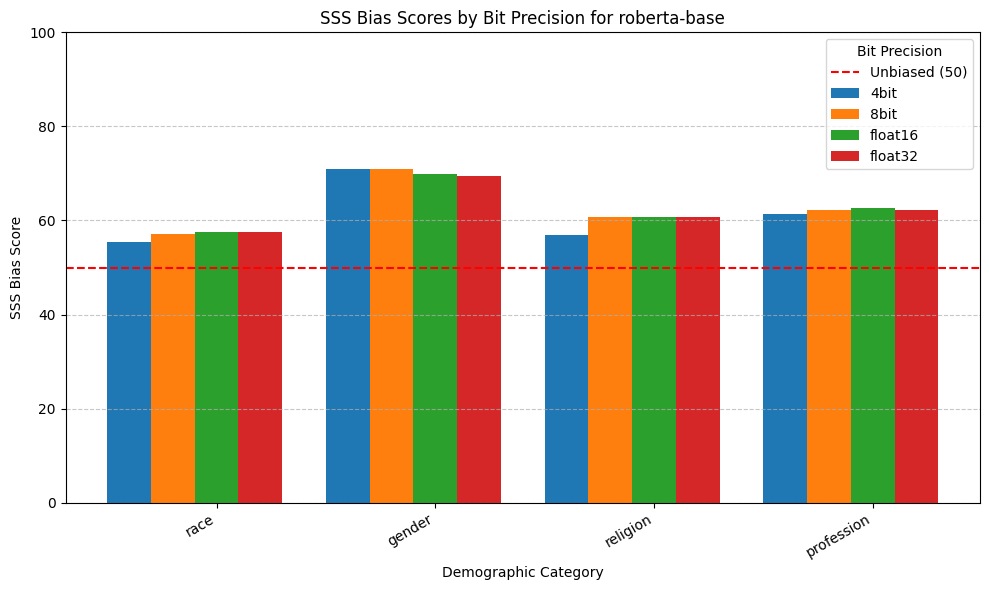

Processing distilroberta-base...
Found JSON: ./results3/ss/distilroberta-base/4bit/ss_distilroberta-base_4bit_seed42.json
Extracted race SSS for distilroberta-base (4bit): 58.41995841995842
Extracted gender SSS for distilroberta-base (4bit): 74.90196078431373
Extracted religion SSS for distilroberta-base (4bit): 67.08860759493672
Extracted profession SSS for distilroberta-base (4bit): 61.97530864197531
Found JSON: ./results3/ss/distilroberta-base/8bit/ss_distilroberta-base_8bit_seed42.json
Extracted race SSS for distilroberta-base (8bit): 58.316008316008315
Extracted gender SSS for distilroberta-base (8bit): 72.94117647058823
Extracted religion SSS for distilroberta-base (8bit): 65.82278481012658
Extracted profession SSS for distilroberta-base (8bit): 62.22222222222222
Found JSON: ./results3/ss/distilroberta-base/float16/ss_distilroberta-base_float16_seed42.json
Extracted race SSS for distilroberta-base (float16): 58.108108108108105
Extracted gender SSS for distilroberta-base (float16)

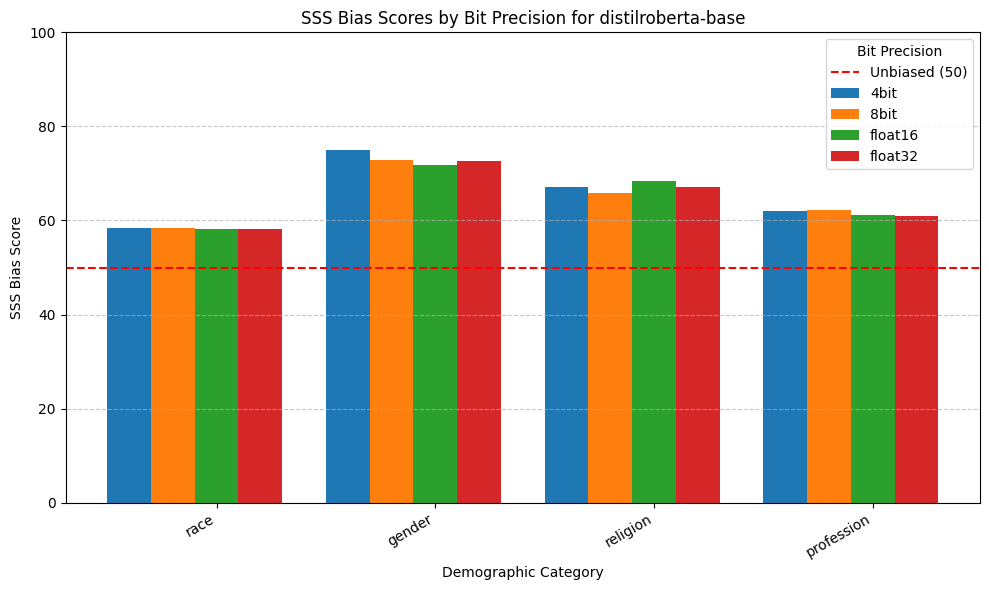


✅ All plots generated successfully!


In [54]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Base directory containing the dataset results
base_dir = "./results3/ss"

# List of bit precisions
bit_precisions = ["4bit", "8bit", "float16", "float32"]

# SSS categories
sss_categories = ["race", "gender", "religion", "profession"]

# Define custom model order
custom_order = [
    "bert-large-uncased",
    "google_mobilebert-uncased",
    "bert-base-uncased",
    "distilbert-base-uncased",
    "roberta-base", 
    "distilroberta-base"
]
print(f"Generating SSS bias plots for all models across bit precisions...\n")

# Loop through all models
for model in custom_order:
    print(f"Processing {model}...")

    # Dictionary to store SSS category scores per bit precision
    sss_scores = {precision: {category: None for category in sss_categories} for precision in bit_precisions}

    # Traverse bit precisions and extract SSS scores
    for precision in bit_precisions:
        json_path = os.path.join(base_dir, model, precision)
        if not os.path.exists(json_path):
            print(f"Skipping missing precision folder: {json_path}")
            continue

        # Find JSON result file
        found_file = False
        for file in os.listdir(json_path):
            if file.endswith(".json") and file.startswith("ss"):  # Ensure it's a JSON result file
                file_path = os.path.join(json_path, file)
                print(f"Found JSON: {file_path}")  # Debug print

                with open(file_path, "r") as f:
                    data = json.load(f)
                    if "sss" in data:  # Extract individual SSS categories
                        for category in sss_categories:
                            if category in data["sss"]:
                                sss_scores[precision][category] = data["sss"][category]
                                print(f"Extracted {category} SSS for {model} ({precision}): {sss_scores[precision][category]}")
                    else:
                        print(f"Warning: 'sss' missing in {file_path}")

                found_file = True
                break  # Stop after finding one valid file

        if not found_file:
            print(f"No valid JSON found for {model} ({precision})")

    # Prepare data for plotting
    categories = list(sss_categories)
    num_categories = len(categories)
    bar_width = 0.2  # Width of each bar
    x = np.arange(num_categories)  # X positions for categories

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot bars for each bit precision
    for i, precision in enumerate(bit_precisions):
        y_values = [sss_scores[precision][category] if sss_scores[precision][category] is not None else 0 for category in categories]
        plt.bar(x + i * bar_width, y_values, width=bar_width, label=precision)

    # Set Y-axis limit to 100
    plt.ylim(0, 100)

    # Add a horizontal line at 50 (unbiased score)
    plt.axhline(50, color='red', linestyle='--', linewidth=1.5, label="Unbiased (50)")

    # Labeling
    plt.xticks(x + bar_width * (len(bit_precisions) / 2), categories, rotation=30, ha="right")
    plt.xlabel("Demographic Category")
    plt.ylabel("SSS Bias Score")
    plt.title(f"SSS Bias Scores by Bit Precision for {model}")
    plt.legend(title="Bit Precision")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

print("\n✅ All plots generated successfully!")


Generating SSS bias plots for all models across bit precisions...

Processing bert-large-uncased...
Found JSON: ./results3/ss/bert-large-uncased/4bit/ss_bert-large-uncased_4bit_seed42.json
Extracted race SSS for bert-large-uncased (4bit): 57.9002079002079
Extracted gender SSS for bert-large-uncased (4bit): 64.70588235294117
Extracted religion SSS for bert-large-uncased (4bit): 56.9620253164557
Extracted profession SSS for bert-large-uncased (4bit): 61.72839506172839
Found JSON: ./results3/ss/bert-large-uncased/8bit/ss_bert-large-uncased_8bit_seed42.json
Extracted race SSS for bert-large-uncased (8bit): 58.108108108108105
Extracted gender SSS for bert-large-uncased (8bit): 65.09803921568627
Extracted religion SSS for bert-large-uncased (8bit): 59.49367088607595
Extracted profession SSS for bert-large-uncased (8bit): 62.34567901234568
Found JSON: ./results3/ss/bert-large-uncased/float16/ss_bert-large-uncased_float16_seed42.json
Extracted race SSS for bert-large-uncased (float16): 58.0041

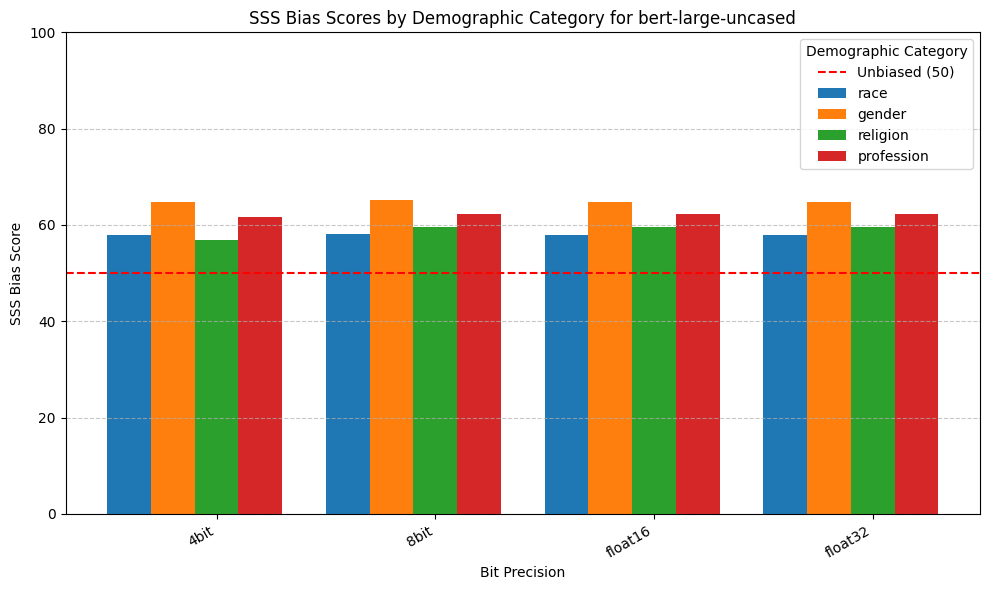

Processing google_mobilebert-uncased...
Found JSON: ./results3/ss/google_mobilebert-uncased/4bit/ss_google_mobilebert-uncased_4bit_seed42.json
Extracted race SSS for google_mobilebert-uncased (4bit): 54.98960498960499
Extracted gender SSS for google_mobilebert-uncased (4bit): 64.31372549019608
Extracted religion SSS for google_mobilebert-uncased (4bit): 62.0253164556962
Extracted profession SSS for google_mobilebert-uncased (4bit): 60.98765432098765
Found JSON: ./results3/ss/google_mobilebert-uncased/8bit/ss_google_mobilebert-uncased_8bit_seed42.json
Extracted race SSS for google_mobilebert-uncased (8bit): 58.21205821205822
Extracted gender SSS for google_mobilebert-uncased (8bit): 63.13725490196078
Extracted religion SSS for google_mobilebert-uncased (8bit): 59.49367088607595
Extracted profession SSS for google_mobilebert-uncased (8bit): 62.46913580246913
Found JSON: ./results3/ss/google_mobilebert-uncased/float16/ss_google_mobilebert-uncased_float16_seed42.json
Extracted race SSS for

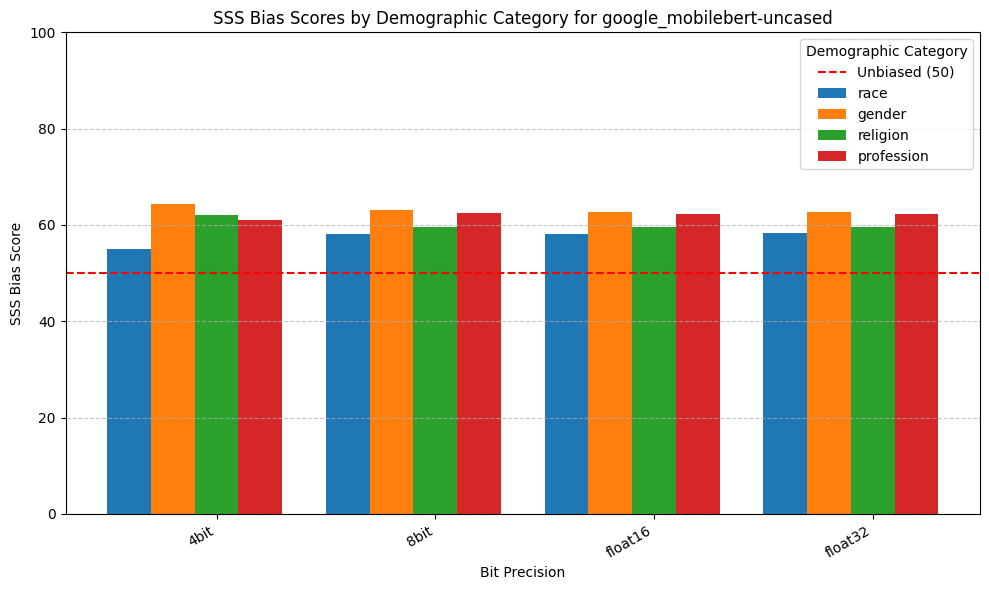

Processing bert-base-uncased...
Found JSON: ./results3/ss/bert-base-uncased/4bit/ss_bert-base-uncased_4bit_seed42.json
Extracted race SSS for bert-base-uncased (4bit): 56.237006237006234
Extracted gender SSS for bert-base-uncased (4bit): 65.09803921568627
Extracted religion SSS for bert-base-uncased (4bit): 60.75949367088608
Extracted profession SSS for bert-base-uncased (4bit): 59.50617283950618
Found JSON: ./results3/ss/bert-base-uncased/8bit/ss_bert-base-uncased_8bit_seed42.json
Extracted race SSS for bert-base-uncased (8bit): 56.237006237006234
Extracted gender SSS for bert-base-uncased (8bit): 66.27450980392156
Extracted religion SSS for bert-base-uncased (8bit): 59.49367088607595
Extracted profession SSS for bert-base-uncased (8bit): 60.74074074074074
Found JSON: ./results3/ss/bert-base-uncased/float16/ss_bert-base-uncased_float16_seed42.json
Extracted race SSS for bert-base-uncased (float16): 56.029106029106025
Extracted gender SSS for bert-base-uncased (float16): 66.66666666666

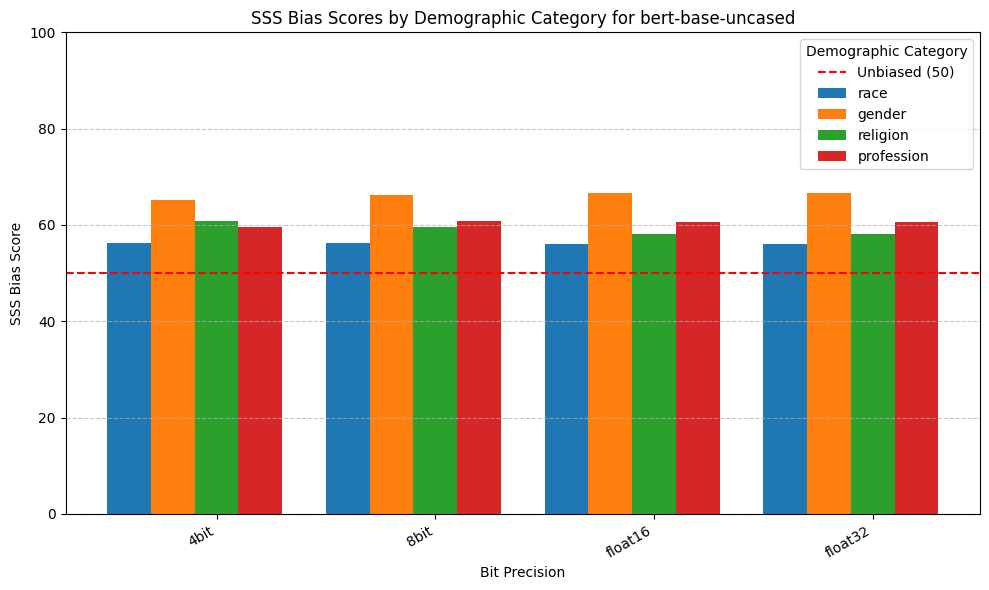

Processing distilbert-base-uncased...
Found JSON: ./results3/ss/distilbert-base-uncased/4bit/ss_distilbert-base-uncased_4bit_seed42.json
Extracted race SSS for distilbert-base-uncased (4bit): 59.35550935550935
Extracted gender SSS for distilbert-base-uncased (4bit): 61.1764705882353
Extracted religion SSS for distilbert-base-uncased (4bit): 62.0253164556962
Extracted profession SSS for distilbert-base-uncased (4bit): 60.49382716049383
Found JSON: ./results3/ss/distilbert-base-uncased/8bit/ss_distilbert-base-uncased_8bit_seed42.json
Extracted race SSS for distilbert-base-uncased (8bit): 58.731808731808734
Extracted gender SSS for distilbert-base-uncased (8bit): 62.35294117647059
Extracted religion SSS for distilbert-base-uncased (8bit): 64.55696202531645
Extracted profession SSS for distilbert-base-uncased (8bit): 61.97530864197531
Found JSON: ./results3/ss/distilbert-base-uncased/float16/ss_distilbert-base-uncased_float16_seed42.json
Extracted race SSS for distilbert-base-uncased (floa

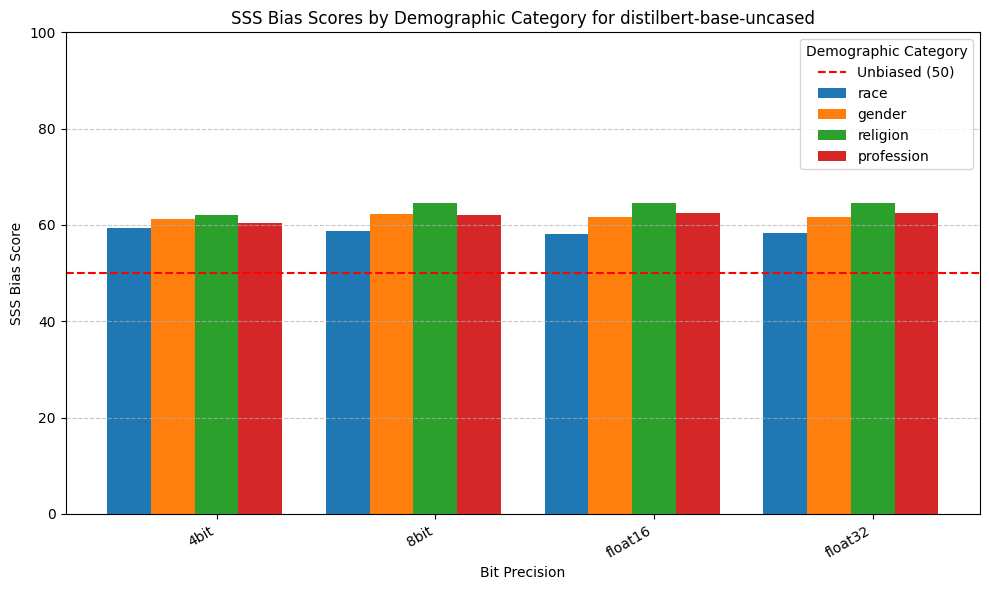

Processing roberta-base...
Found JSON: ./results3/ss/roberta-base/4bit/ss_roberta-base_4bit_seed42.json
Extracted race SSS for roberta-base (4bit): 55.4054054054054
Extracted gender SSS for roberta-base (4bit): 70.98039215686275
Extracted religion SSS for roberta-base (4bit): 56.9620253164557
Extracted profession SSS for roberta-base (4bit): 61.358024691358025
Found JSON: ./results3/ss/roberta-base/8bit/ss_roberta-base_8bit_seed42.json
Extracted race SSS for roberta-base (8bit): 57.17255717255717
Extracted gender SSS for roberta-base (8bit): 70.98039215686275
Extracted religion SSS for roberta-base (8bit): 60.75949367088608
Extracted profession SSS for roberta-base (8bit): 62.22222222222222
Found JSON: ./results3/ss/roberta-base/float16/ss_roberta-base_float16_seed42.json
Extracted race SSS for roberta-base (float16): 57.484407484407484
Extracted gender SSS for roberta-base (float16): 69.80392156862744
Extracted religion SSS for roberta-base (float16): 60.75949367088608
Extracted profe

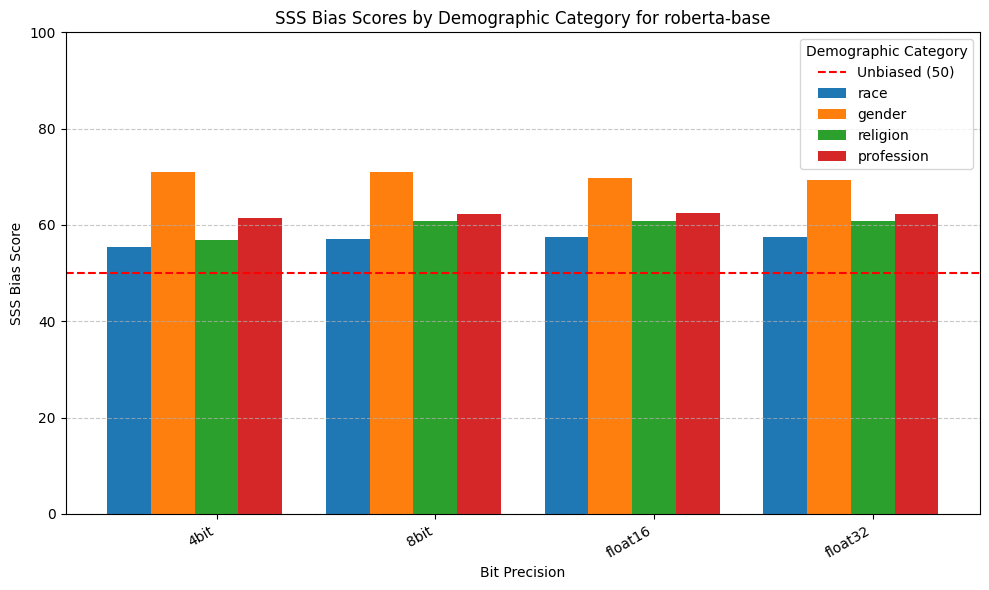

Processing distilroberta-base...
Found JSON: ./results3/ss/distilroberta-base/4bit/ss_distilroberta-base_4bit_seed42.json
Extracted race SSS for distilroberta-base (4bit): 58.41995841995842
Extracted gender SSS for distilroberta-base (4bit): 74.90196078431373
Extracted religion SSS for distilroberta-base (4bit): 67.08860759493672
Extracted profession SSS for distilroberta-base (4bit): 61.97530864197531
Found JSON: ./results3/ss/distilroberta-base/8bit/ss_distilroberta-base_8bit_seed42.json
Extracted race SSS for distilroberta-base (8bit): 58.316008316008315
Extracted gender SSS for distilroberta-base (8bit): 72.94117647058823
Extracted religion SSS for distilroberta-base (8bit): 65.82278481012658
Extracted profession SSS for distilroberta-base (8bit): 62.22222222222222
Found JSON: ./results3/ss/distilroberta-base/float16/ss_distilroberta-base_float16_seed42.json
Extracted race SSS for distilroberta-base (float16): 58.108108108108105
Extracted gender SSS for distilroberta-base (float16)

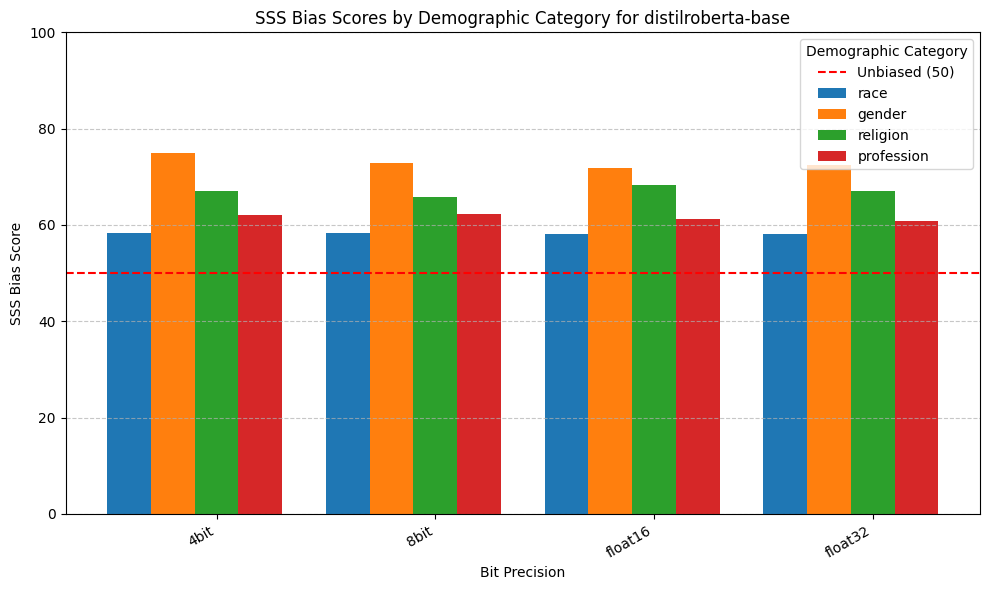


✅ All plots generated successfully!


In [55]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Base directory containing the dataset results
base_dir = "./results3/ss"

# List of bit precisions
bit_precisions = ["4bit", "8bit", "float16", "float32"]

# SSS categories
sss_categories = ["race", "gender", "religion", "profession"]

# Define custom model order
custom_order = [
    "bert-large-uncased",
    "google_mobilebert-uncased",
    "bert-base-uncased",
    "distilbert-base-uncased",
    "roberta-base", 
    "distilroberta-base"
]
print(f"Generating SSS bias plots for all models across bit precisions...\n")

# Loop through all models
for model in custom_order:
    print(f"Processing {model}...")

    # Dictionary to store SSS category scores per bit precision
    sss_scores = {precision: {category: None for category in sss_categories} for precision in bit_precisions}

    # Traverse bit precisions and extract SSS scores
    for precision in bit_precisions:
        json_path = os.path.join(base_dir, model, precision)
        if not os.path.exists(json_path):
            print(f"Skipping missing precision folder: {json_path}")
            continue

        # Find JSON result file
        found_file = False
        for file in os.listdir(json_path):
            if file.endswith(".json") and file.startswith("ss"):  # Ensure it's a JSON result file
                file_path = os.path.join(json_path, file)
                print(f"Found JSON: {file_path}")  # Debug print

                with open(file_path, "r") as f:
                    data = json.load(f)
                    if "sss" in data:  # Extract individual SSS categories
                        for category in sss_categories:
                            if category in data["sss"]:
                                sss_scores[precision][category] = data["sss"][category]
                                print(f"Extracted {category} SSS for {model} ({precision}): {sss_scores[precision][category]}")
                    else:
                        print(f"Warning: 'sss' missing in {file_path}")

                found_file = True
                break  # Stop after finding one valid file

        if not found_file:
            print(f"No valid JSON found for {model} ({precision})")

    # Prepare data for plotting
    precisions = list(bit_precisions)
    num_precisions = len(precisions)
    bar_width = 0.2  # Width of each bar
    x = np.arange(num_precisions)  # X positions for precisions

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot bars for each demographic category
    for i, category in enumerate(sss_categories):
        y_values = [sss_scores[precision][category] if sss_scores[precision][category] is not None else 0 for precision in precisions]
        plt.bar(x + i * bar_width, y_values, width=bar_width, label=category)

    # Set Y-axis limit to 100
    plt.ylim(0, 100)

    # Add a horizontal line at 50 (unbiased score)
    plt.axhline(50, color='red', linestyle='--', linewidth=1.5, label="Unbiased (50)")

    # Labeling
    plt.xticks(x + bar_width * (len(sss_categories) / 2), precisions, rotation=30, ha="right")
    plt.xlabel("Bit Precision")
    plt.ylabel("SSS Bias Score")
    plt.title(f"SSS Bias Scores by Demographic Category for {model}")
    plt.legend(title="Demographic Category")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

print("\n✅ All plots generated successfully!")
